In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
from sklearn.preprocessing import StandardScaler

In [2]:
df= pd.read_csv('Walmart_Store_sales.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df= df.rename(columns={'Store':'store','Date':'date','Weekly_Sales':'weekly_sales','Holiday_Flag':'holiday_flag','Temperature':'temp',
                   'Fuel_Price':'fuel_price','CPI':'cpi','Unemployment':'unemployment'})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         6435 non-null   int64  
 1   date          6435 non-null   object 
 2   weekly_sales  6435 non-null   float64
 3   holiday_flag  6435 non-null   int64  
 4   temp          6435 non-null   float64
 5   fuel_price    6435 non-null   float64
 6   cpi           6435 non-null   float64
 7   unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# 1 Basic Statistics Task

## 1.1 Store with Maximum Sale

In [5]:
print('Store with Highest Sale')
print((df.groupby('store').sum('weekly_sales').sort_values('weekly_sales',ascending=False))['weekly_sales'].iloc[:3])

Store with Highest Sale
store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
Name: weekly_sales, dtype: float64


## 1.2 Highest Standard Deviation in weekly_sales for top 3 Stores

In [6]:
std_df= df.groupby('store').agg({'weekly_sales':['std','mean']}).sort_values(('weekly_sales','std'),ascending=False)
std_df['coefficient_Of_variance']= std_df[('weekly_sales','std')]/std_df[('weekly_sales','mean')]*100
print('\nStore with Highest Standard Deviation in Sales')
print(std_df.iloc[:3])


Store with Highest Standard Deviation in Sales
        weekly_sales               coefficient_Of_variance
                 std          mean                        
store                                                     
14     317569.949476  2.020978e+06               15.713674
10     302262.062504  1.899425e+06               15.913349
20     275900.562742  2.107677e+06               13.090269


## 1.3 Highest Growth rate for top 3 Stores in Q3 2012

In [7]:
df['date']= pd.to_datetime(df['date'],format='%d-%m-%Y')

In [8]:
from datetime import datetime as dt
q2_start= dt(2012,4,1)
q2_end= dt(2012,6,30)
q3_start= dt(2012,7,1)
q3_end= dt(2012,9,30)

In [9]:
q2_df= df[df['date'].between(q2_start,q2_end)][['store','weekly_sales']]
q3_df= df[df['date'].between(q3_start,q3_end)][['store','weekly_sales']]

In [10]:
quarters_df= q3_df.groupby('store').sum('weekly_sales').sort_index()
quarters_df= quarters_df.rename(columns={'weekly_sales':'q3_sales'})
quarters_df['q2_sales']= q2_df.groupby('store').sum('weekly_sales')['weekly_sales'].sort_index()
quarters_df['growth_rate']= (quarters_df.q3_sales-quarters_df.q2_sales)/quarters_df.q2_sales
quarters_df.sort_values('growth_rate',ascending=False).iloc[:3]

,q3_sales,q2_sales,growth_rate
store,,,
7,8262787.39,7290859.27,0.133308
16,7121541.64,6564335.98,0.084884
35,11322421.12,10838313.00,0.044666


## 1.4 Holiday and Non-Holidays AVG Sales comparision

In [11]:
df.groupby('holiday_flag')['weekly_sales'].mean()

holiday_flag
0    1.041256e+06
1    1.122888e+06
Name: weekly_sales, dtype: float64

In [12]:
ch1 = dt(2010,12,31)
ch2 = dt(2011,12,30)
ch3 = dt(2012,12,28)
ch4 = dt(2013,12,27)

th1= dt(2010,11,26)
th2= dt(2011,11,25)
th3= dt(2012,11,23)
th4= dt(2013,11,29)

la1= dt(2010,9,10)
la2= dt(2011,9,9)
la3= dt(2012,9,7)
la4= dt(2013,9,6)

su1= dt(2010,2,12)
su2= dt(2011,2,11)
su3= dt(2012,2,10)
su4= dt(2013,2,8)

In [13]:
christmas_mean_df= df[(df['date']== ch1) | (df['date']== ch2) | (df['date']== ch3) | (df['date']== ch4)]
thanksgiving_mean_df= df[(df['date']== th1) | (df['date']== th2) | (df['date']== th3) | (df['date']== th4)]
labourday_mean_df= df[(df['date']== la1) | (df['date']== la2) | (df['date']== la3) | (df['date']== la4)]
superbowl_mean_df= df[(df['date']== su1) | (df['date']== su2) | (df['date']== su3) | (df['date']== su4)]

In [14]:
dict_mean_sales = {'Thanksgiving_Mean_Sales': thanksgiving_mean_df['weekly_sales'].mean(),
                   'SuperBowl_Mean_Sales': superbowl_mean_df['weekly_sales'].mean(),
                   'LabourDay_Mean_Sales' : labourday_mean_df['weekly_sales'].mean(),
                   'Non_Holiday_Weekly_Sales' : df[df['holiday_flag'] == 0 ]['weekly_sales'].mean(),
                   'Christmas_Mean_Sales' : christmas_mean_df['weekly_sales'].mean()}

### Only Christmas in Holidays has bad AVG sales than Non-Holiday days

<BarContainer object of 5 artists>

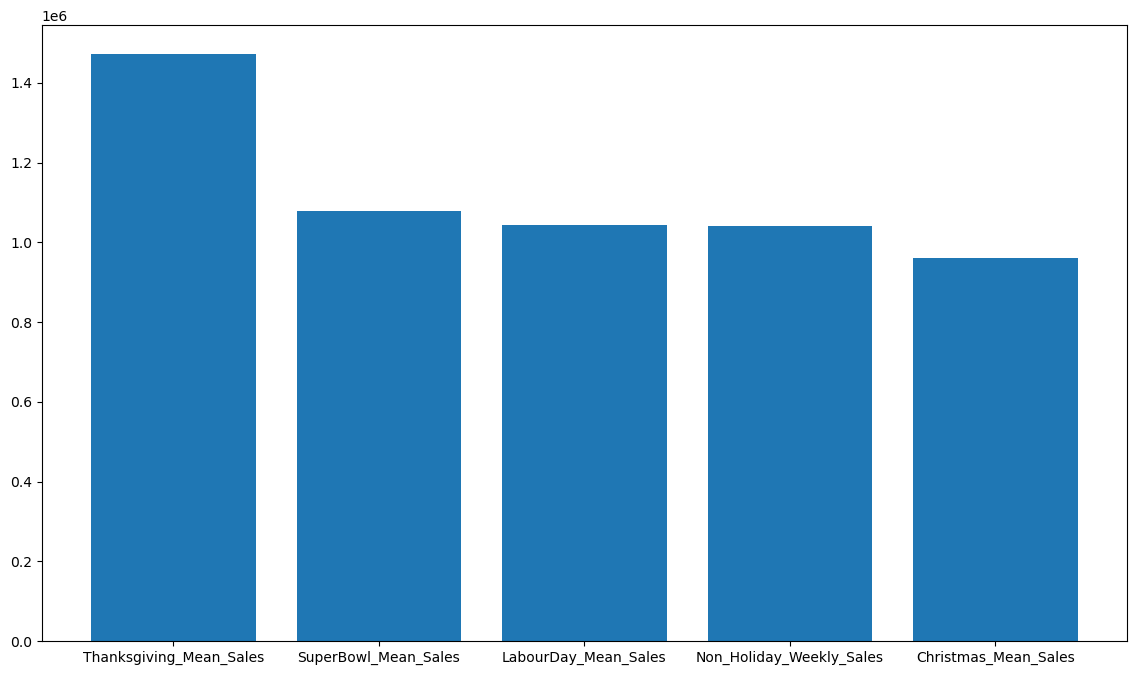

In [15]:
plt.figure(figsize=(14,8),dpi=100)
plt.bar(x=dict_mean_sales.keys(), height=dict_mean_sales.values())

## 1.5 Monthly, Quarterly, Semester-wise Sale Analysis

Text(0, 0.5, 'Weekly_Sales')

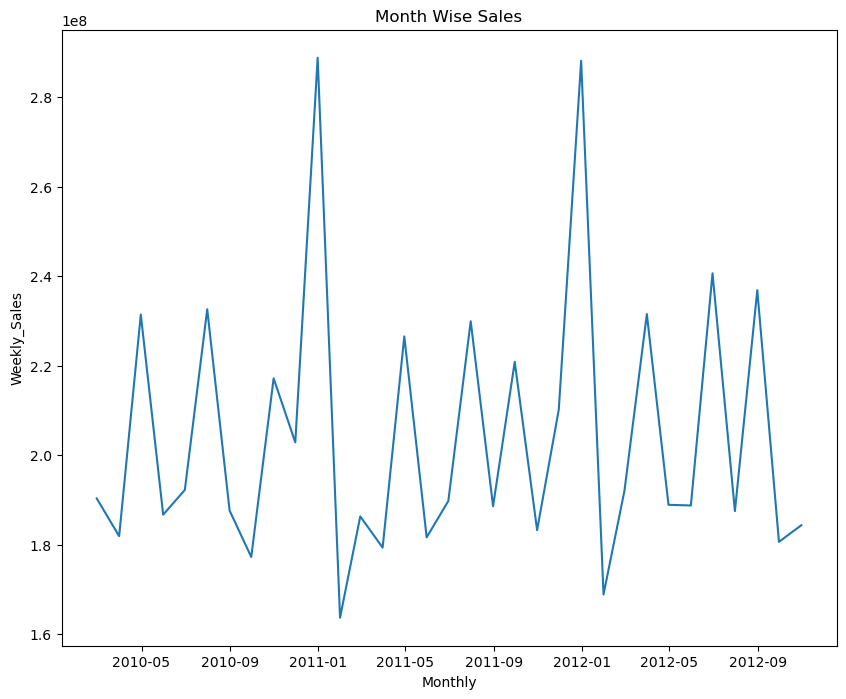

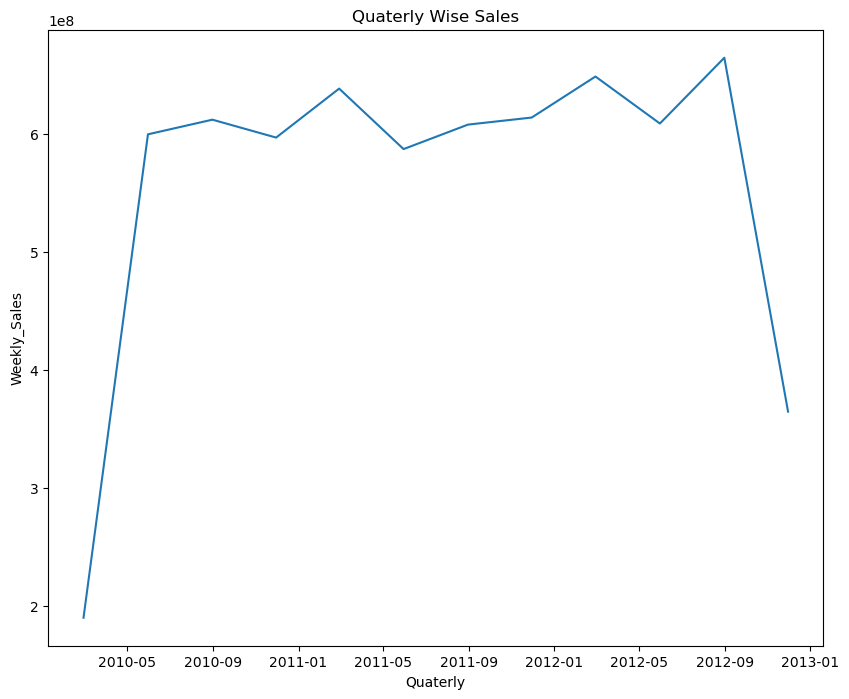

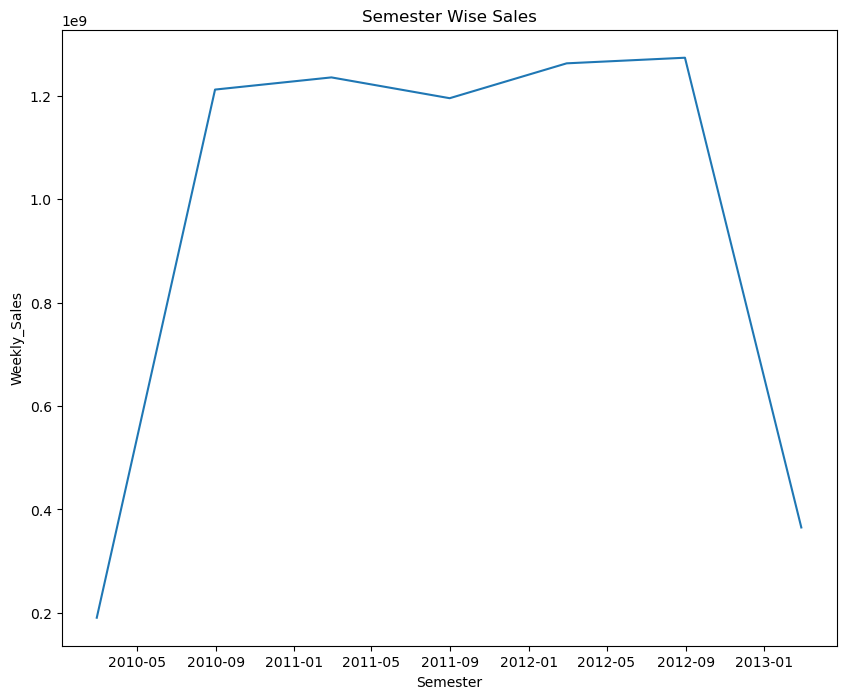

In [16]:
monthly= df.groupby(pd.Grouper(key='date', freq='1M')).sum()
monthly= monthly.reset_index()
fig,ax= plt.subplots(figsize=(10,8))
plt.plot(monthly['date'],monthly['weekly_sales'])
plt.title('Month Wise Sales')
plt.xlabel('Monthly')
plt.ylabel('Weekly_Sales')

quaterly= df.groupby(pd.Grouper(key='date', freq='3M')).sum()
quaterly= quaterly.reset_index()
fig,ax= plt.subplots(figsize=(10,8))
plt.plot(quaterly['date'],quaterly['weekly_sales'])
plt.title('Quaterly Wise Sales')
plt.xlabel('Quaterly')
plt.ylabel('Weekly_Sales')

semester= df.groupby(pd.Grouper(key='date', freq='6M')).sum()
semester= semester.reset_index()
fig,ax= plt.subplots(figsize=(10,8))
plt.plot(semester['date'],semester['weekly_sales'])
plt.title('Semester Wise Sales')
plt.xlabel('Semester')
plt.ylabel('Weekly_Sales')

# 2 Statistical Models

## 2.1 Linear Regression Models

In [17]:
data= df[df.store==1]
data['date']= np.arange(1,144)
scaler= StandardScaler()
scaler.fit(data)
data.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_10744\2008928399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date']= np.arange(1,144)


,store,date,weekly_sales,holiday_flag,temp,fuel_price,cpi,unemployment
0,1,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,3,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,4,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,5,1554806.68,0,46.50,2.625,211.350143,8.106


In [18]:
y= data.weekly_sales
X= data.drop(columns=['weekly_sales','store','date'])
X_train,X_test,y_train,y_test= tts(X,y,test_size=0.2,random_state=42)

Root Mean Squared Error(RMSE):
 152799.6222036366
R-Squared:
 0.034707216167411015


<Axes: title={'center': 'Linear regression'}, xlabel='weekly_sales'>

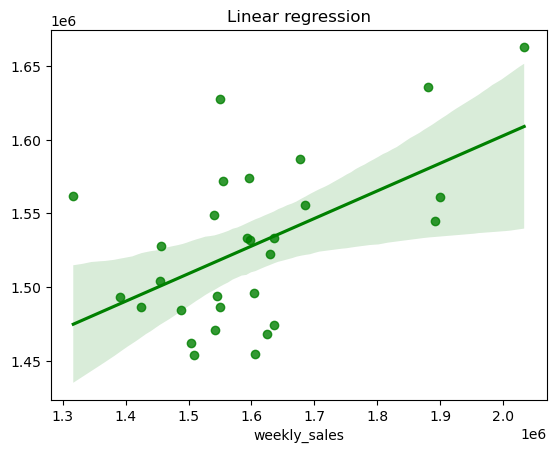

In [19]:
model= LinearRegression()
model.fit(X_train,y_train)
y_test_pred= model.predict(X_test)
print('Root Mean Squared Error(RMSE):\n', np.sqrt(mse(y_test, y_test_pred)))
print('R-Squared:\n',r2(y_test,y_test_pred))
plt.title('Linear regression')
sns.regplot(x=y_test,y=y_test_pred,color='green')

Root Mean Squared Error(RMSE):
 152801.3455588893
R-Squared:
 0.03468544187573952


<Axes: title={'center': 'Lasso regression'}, xlabel='weekly_sales'>

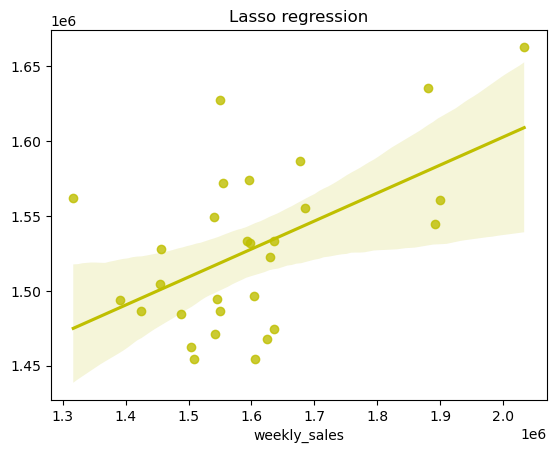

In [20]:
lasso_reg=Lasso(alpha=1)
lasso_reg.fit(X_train,y_train)
lasso_y_pred=lasso_reg.predict(X_test)
print('Root Mean Squared Error(RMSE):\n', np.sqrt(mse(y_test, lasso_y_pred)))
print('R-Squared:\n',r2(y_test,lasso_y_pred))
plt.title('Lasso regression')
sns.regplot(x=y_test,y=lasso_y_pred,color='y')

Root Mean Squared Error(RMSE):
 153500.45817498674
R-Squared:
 0.025832019326815225


<Axes: title={'center': 'Ridge regression'}, xlabel='weekly_sales'>

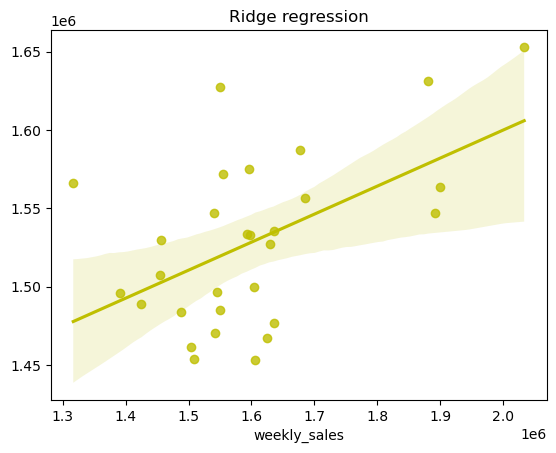

In [21]:
ridge_reg= Ridge(alpha=1)
ridge_reg.fit(X_train,y_train)
ridge_y_pred= ridge_reg.predict(X_test)
print('Root Mean Squared Error(RMSE):\n', np.sqrt(mse(y_test, ridge_y_pred)))
print('R-Squared:\n',r2(y_test,ridge_y_pred))
plt.title('Ridge regression')
sns.regplot(x=y_test,y=ridge_y_pred,color='y')

### Comparing Coefficient of Regression

In [22]:
model.coef_

array([ 61993.93468347,  -2617.60358042, -34338.15293787,  13422.2576375 ,
        42279.48782025])

In [23]:
lasso_reg.coef_

array([ 61981.19739554,  -2617.81139176, -34315.03465077,  13418.36841804,
        42250.22731354])

In [24]:
ridge_reg.coef_

array([ 55418.46643272,  -2685.2272262 , -28648.03740797,  12409.08802479,
        34293.58901002])

### Regression Coefficient for Fuel_Price is reducing accuracy of model in comparision with CPI and Unemployment so we drop it

In [25]:
y= data.weekly_sales
X= data.drop(columns=['weekly_sales','store','date','fuel_price'])
X_train,X_test,y_train,y_test= tts(X,y,test_size=0.2,random_state=42)

Root Mean Squared Error(RMSE):
 152260.04079652095
R-Squared:
 0.041512656979042495


<Axes: title={'center': 'Linear regression'}, xlabel='weekly_sales'>

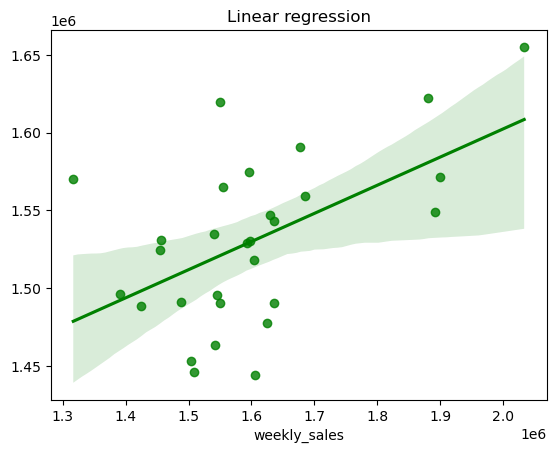

In [26]:
model= LinearRegression()
model.fit(X_train,y_train)
y_test_pred= model.predict(X_test)
print('Root Mean Squared Error(RMSE):\n', np.sqrt(mse(y_test, y_test_pred)))
print('R-Squared:\n',r2(y_test,y_test_pred))
plt.title('Linear regression')
sns.regplot(x=y_test,y=y_test_pred,color='green')

Root Mean Squared Error(RMSE):
 152262.39307026667
R-Squared:
 0.04148304130290403


<Axes: title={'center': 'Lasso regression'}, xlabel='weekly_sales'>

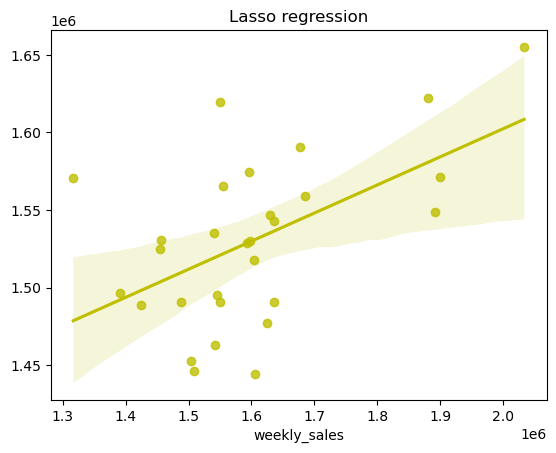

In [27]:
lasso_reg=Lasso(alpha=1)
lasso_reg.fit(X_train,y_train)
lasso_y_pred=lasso_reg.predict(X_test)
print('Root Mean Squared Error(RMSE):\n', np.sqrt(mse(y_test, lasso_y_pred)))
print('R-Squared:\n',r2(y_test,lasso_y_pred))
plt.title('Lasso regression')
sns.regplot(x=y_test,y=lasso_y_pred,color='y')

Root Mean Squared Error(RMSE):
 153007.1958681327
R-Squared:
 0.032082792684975825


<Axes: title={'center': 'Ridge regression'}, xlabel='weekly_sales'>

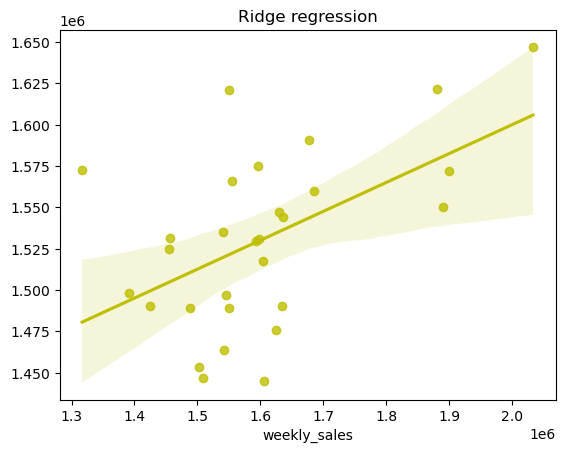

In [28]:
ridge_reg= Ridge(alpha=1)
ridge_reg.fit(X_train,y_train)
ridge_y_pred= ridge_reg.predict(X_test)
print('Root Mean Squared Error(RMSE):\n', np.sqrt(mse(y_test, ridge_y_pred)))
print('R-Squared:\n',r2(y_test,ridge_y_pred))
plt.title('Ridge regression')
sns.regplot(x=y_test,y=ridge_y_pred,color='y')

# Linear Regression Model give the best performance on test case

## 2.2 Creating Day column from Date in the Dataframe

### We cannot utilize DAY column in ML models as there is only 1 unique value in the whole column

In [29]:
df['days']= df.date.dt.dayofweek
df.days= df.days.map({0:'Monday',
             1:'Tuesday',
             2:'Wednesday',
             3:'Thursday',
             4:'Friday',
             5:'Saturday',
             6:'Friday',})

In [30]:
df.head()

,store,date,weekly_sales,holiday_flag,temp,fuel_price,cpi,unemployment,days
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,Friday
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,Friday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Friday
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,Friday
